In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import avro.schema
from avro.datafile import DataFileReader
from avro.io import DatumReader
import pandas as pd
from datetime import datetime
import pytz
import neurokit2 as nk
import rapidhrv as rhv

In [3]:
import os
import pandas as pd


# Define the input and output directories
input_dir = "/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr"  # Input directory containing subject folders
output_dir = "/Users/dhwanishah/Desktop/MS/VR-Dhwani/rapidhrv-processed-hr"      # Output directory to save processed files

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Loop through each subject folder
for subject_folder in os.listdir(input_dir):
    subject_path = os.path.join(input_dir, subject_folder)
    
    if os.path.isdir(subject_path):  # Check if it's a directory
        # Create a corresponding folder in the output directory for the subject
        subject_output_path = os.path.join(output_dir, subject_folder)
        os.makedirs(subject_output_path, exist_ok=True)

        # Loop through each session file in the subject folder
        for session_file in os.listdir(subject_path):
            session_path = os.path.join(subject_path, session_file)
            
            if session_file.endswith('.csv'):  # Process only CSV files
                # Load the data
                data = pd.read_csv(session_path)

                ppg_signal = data['PPG_Raw']  # Make sure this matches your actual column name
                sampling_rate = 64  # Adjust as necessary
                signal = rhv.Signal(data=ppg_signal.values, sample_rate=sampling_rate)
                preprocessed = rhv.preprocess(signal, resample_rate=64)
                analyzed = rhv.analyze(preprocessed)
                
                # Combine the new timestamp with the processed signals
                combined_data = analyzed[['Time', 'BPM', 'RMSSD', 'SDNN', 'SDSD', 'pNN20', 'pNN50', 'HF',
                                          'Outlier', 'Window']]

                # Save the combined data to a new CSV file in the processed folder
                output_file_path = os.path.join(subject_output_path, session_file)
                combined_data.to_csv(output_file_path, index=False)

print("Processing complete! The processed files are saved in the 'processed-hr' folder.")


Processing complete! The processed files are saved in the 'processed-hr' folder.


In [72]:
import pandas as pd
import rapidhrv as rhv
# Load your PPG data
data = pd.read_csv('/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr/sub-2/session-4.csv')

# Extract PPG signal
ppg_signal = data['PPG_Raw']  # Make sure this matches your actual column name
sampling_rate = 64  # Adjust as necessary
signal = rhv.Signal(data=ppg_signal.values, sample_rate=sampling_rate)
preprocessed = rhv.preprocess(signal, resample_rate=64)
analyzed = rhv.analyze(preprocessed)
rhv.visualize(analyzed)

# Explore the analyzed HRV data
# print(analyzed)


In [39]:
for column in signals.columns:
    print(column,data[column].mean(),signals[column].mean())

print(signals.columns)
print(analyzed.columns)



PPG_Raw 9.490539169145326e-06 9.49053916914918e-06
PPG_Clean 6.156658924534362e-06 6.156658924537881e-06
PPG_Rate 132.79952239232543 132.79952239232543
PPG_Quality 0.9525498088112824 0.9525498088112824
PPG_Peaks 0.021637304250559285 0.021637304250559285
Index(['PPG_Raw', 'PPG_Clean', 'PPG_Rate', 'PPG_Quality', 'PPG_Peaks'], dtype='object')
Index(['Time', 'BPM', 'RMSSD', 'SDNN', 'SDSD', 'pNN20', 'pNN50', 'HF',
       'Outlier', 'Window'],
      dtype='object')


In [41]:
# import warnings
# warnings.filterwarnings("ignore")
# import os
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import avro.schema
# from avro.datafile import DataFileReader
# from avro.io import DatumReader
# import pandas as pd
# from datetime import datetime
# import pytz
# import neurokit2 as nk
# import rapidhrv as rhv

# file_ref = pd.read_excel('/Users/dhwanishah/Desktop/MS/VR-Dhwani/avros-to-analyze.xlsx')
# input_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-avros'
# eda_output_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
# hr_output_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/rapidhrv-avro-to-csvs'


# def extract_eda_from_avro(file_path):
#     with open(file_path, 'rb') as avro_file:
#         reader = DataFileReader(avro_file, DatumReader())
#         record = next(reader)
#         rawData = record.get('rawData', None)
#         eda = rawData.get('eda', None)
#         bvp = rawData.get('bvp', None)
#         systolicPeaks = rawData.get('systolicPeaks', None)
#     return eda, bvp, systolicPeaks


# def convert_est_edt_to_utc(eastern_time):
#     eastern = pytz.timezone('America/New_York')
#     eastern_time = eastern.localize(eastern_time)
#     utc_time = eastern_time.astimezone(pytz.utc)
#     return utc_time


# for index, row in file_ref.iterrows():
#     input_path = (os.path.join(input_dir, row['SubID'], row['FileName-1']))

# with open(input_path, 'rb') as avro_file:
#     reader = DataFileReader(avro_file, DatumReader())
#     record = next(reader)

# eda, data_bvp, data_systolic_peaks = extract_eda_from_avro(input_path)



In [63]:
import os
import pandas as pd
import pytz
from datetime import datetime
import neurokit2 as nk

# Function to convert Eastern Time (EDT) to UTC
def convert_est_edt_to_utc(eastern_time_str):
    eastern = pytz.timezone('America/New_York')
    
    # Convert the string to a datetime object
    eastern_time = datetime.strptime(eastern_time_str, '%Y/%m/%d %I:%M:%S %p')
    
    # Localize the naive datetime object
    eastern_time = eastern.localize(eastern_time)
    utc_time = eastern_time.astimezone(pytz.utc)
    
    return utc_time

# Read the Excel file
file_ref = pd.read_excel('/Users/dhwanishah/Desktop/MS/VR-Dhwani/avros-to-analyze.xlsx')

# Initialize a list to hold BVP DataFrames
bvp_dfs = [None] * len(file_ref)

# Example input and output directories (adjust as necessary)
input_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-avros'
hr_output_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/rapidhrv-avro-to-csvs'

# Example paths for a specific subject
input_path = "/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-avros/sub-2/1-1-VRTL02S4_1712239181.avro"
hr_output_path = "/Users/dhwanishah/Desktop/MS/VR-Dhwani/rapidhrv-avro-to-csvs"

# Define start and end times
start_time = convert_est_edt_to_utc('2024/04/04 10:16:54 AM')
start_time = pd.to_datetime(start_time, utc=True)

end_time = convert_est_edt_to_utc('2024/04/04 10:24:21 AM')
end_time = pd.to_datetime(end_time, utc=True)

# Extract EDA and BVP data from AVRO file
eda_data, bvp_data, systolicPeaks_data = extract_eda_from_avro(input_path)

bvp_values = bvp_data['values']
bvp_timestamp_start = bvp_data['timestampStart']
bvp_sampling_frequency = bvp_data['samplingFrequency']

print(bvp_data)

# Clean bvp signal
# ppg_cleaned = nk.ppg_clean(bvp_values, sampling_rate=bvp_sampling_frequency)
# bvp_df, info = nk.ppg_process(ppg_cleaned, sampling_rate = bvp_sampling_frequency)
    
    # Convert timestamp_start from microseconds to seconds
bvp_timestamp_start_seconds = bvp_timestamp_start / 1_000_000
    
    # Generate a list of bvp timestamps
time_seconds = list(range(len(bvp_values)))
bvp_timestamps = [bvp_timestamp_start_seconds + t / bvp_sampling_frequency for t in time_seconds]

    # Convert timestamps to datetime objects
bvp_datetime_objects = pd.to_datetime(bvp_timestamps, unit='s', utc=True)
    
    # Add timestamps to df
bvp_df.insert(0, 'Timestamp', bvp_datetime_objects)
        
bvp_df = bvp_df[(bvp_df['Timestamp'] >= start_time) & (bvp_df['Timestamp'] <= end_time)].reset_index(drop=True)
    # bvp_dfs[index] = bvp_df

    # Save the DataFrame as a csv
    #bvp_df.to_csv(f"{hr_output_path}.csv", index=False)

print(index)

# Extract PPG signal
ppg_signal = bvp_df['PPG_Raw']  # Make sure this matches your actual column name
sampling_rate = 40  # Adjust as necessary
signal = rhv.Signal(data=ppg_signal.values, sample_rate=sampling_rate)
preprocessed = rhv.preprocess(signal)
analyzed = rhv.analyze(preprocessed)
rhv.visualize(analyzed)

# # Explore the analyzed HRV data
# print(analyzed)

In [61]:
# print(bvp_df)
# print(analyzed)

In [4]:
import os
import pandas as pd

# Path to the main folder containing subfolders for each subject
main_folder = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/rapidhrv-processed-hr'

# Dictionary to store the mean SCR_Amplitude values for each subject and session
subject_mean_data = {}

# Traverse the main folder
for subject_folder in sorted(os.listdir(main_folder)):
    subject_path = os.path.join(main_folder, subject_folder)
    
    # Ensure it's a folder (ignore files in the main folder)
    if os.path.isdir(subject_path):
        # Dictionary to store mean SCR_Amplitude values for each session
        session_mean_data = {}

        # Traverse the session files in each subject folder
        for session_file in sorted(os.listdir(subject_path)):
            if session_file.endswith('.csv'):
                session_path = os.path.join(subject_path, session_file)
                
                # Read the CSV file
                df = pd.read_csv(session_path)
                
                # Calculate the mean SCR_Height where SCR_Peaks == 1 and SCR_Height > 0.02
                mean_SCR_Amp = df['BPM'].mean()

                # Save the mean value for the session
                session_mean_data[session_file] = mean_SCR_Amp
        
        # Save the mean data for the subject
        subject_mean_data[subject_folder] = session_mean_data

# Print the mean SCR_Amplitude values for each subject and session
for subject, sessions in subject_mean_data.items():
    print(f"Subject: {subject}")
    for session, mean_value in sessions.items():
        print(f"  Session: {session}, Mean HR: {mean_value}")
    print("-" * 50)  # Divider between subjects


Subject: sub-1
  Session: session-1.csv, Mean HR: 43.118166821504715
  Session: session-2.csv, Mean HR: 39.464101352166956
  Session: session-3.csv, Mean HR: 44.02536305507326
  Session: session-4.csv, Mean HR: 47.99946097848475
  Session: session-5a.csv, Mean HR: 47.98133563630751
  Session: session-5b.csv, Mean HR: 56.759374693863734
--------------------------------------------------
Subject: sub-10
  Session: session-1.csv, Mean HR: 77.49238396086871
  Session: session-2.csv, Mean HR: 73.46476920815088
  Session: session-3.csv, Mean HR: 73.75153370957688
  Session: session-4.csv, Mean HR: 62.54565900426618
  Session: session-5a.csv, Mean HR: 53.86360755238402
  Session: session-5b.csv, Mean HR: 59.39966750369316
--------------------------------------------------
Subject: sub-11
  Session: session-1.csv, Mean HR: 40.56109485628195
  Session: session-2.csv, Mean HR: 49.868718755513186
  Session: session-3.csv, Mean HR: 61.0358694058099
  Session: session-4.csv, Mean HR: 37.62192091477

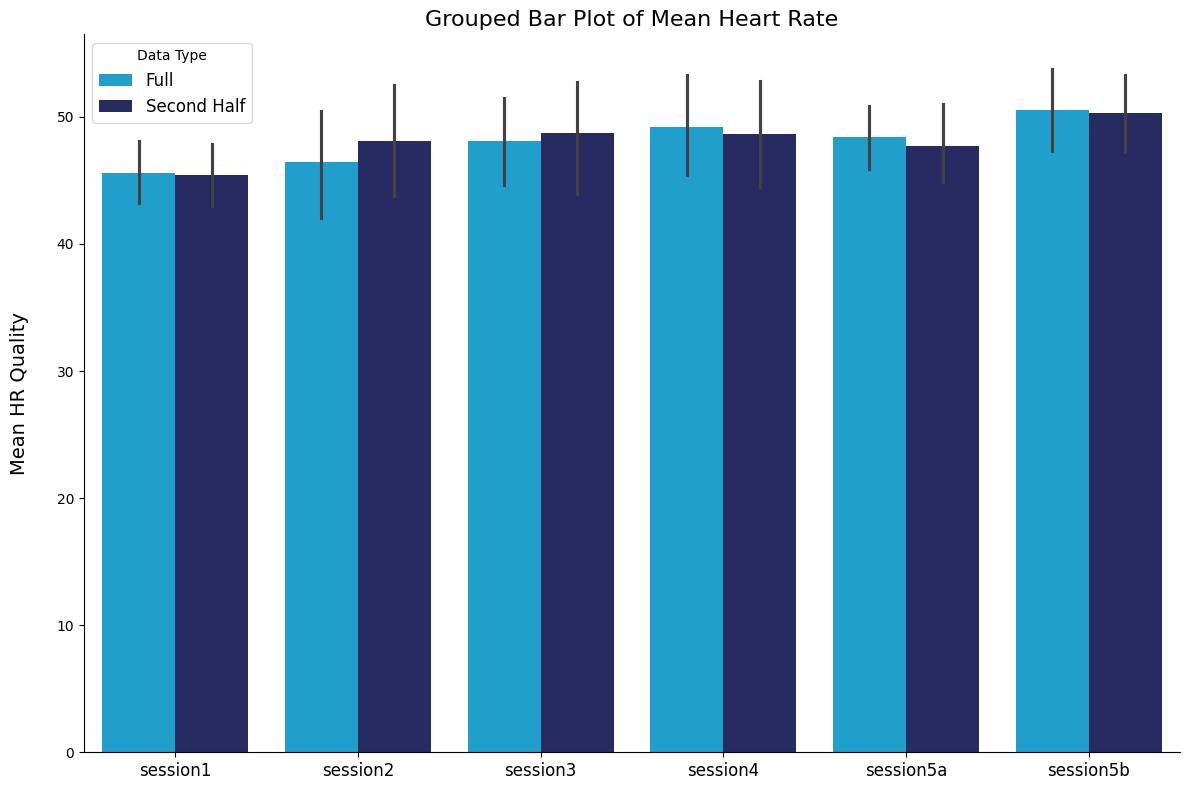

In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/rapidhrv-processed-hr'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means_full = []
session_means_second_half = []

for session_file, session_name in zip(sessions, session_names):
    # Loop through subjects
    for sub_dir in sorted(os.listdir(base_dir)):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)

                # Calculate mean for the full data
                mean_full = df_session['BPM'].mean()
                session_means_full.append([sub_dir, session_name, mean_full])

                # Calculate mean for the second half
                half_way_point = int(len(df_session) / 2)
                df_session_second_half = df_session.iloc[half_way_point:]
                mean_tonic_eda = df_session_second_half['BPM'].mean()
                session_means_second_half.append([sub_dir, session_name, mean_tonic_eda])

# Create DataFrames for full and second half means
df_full_means = pd.DataFrame(session_means_full, columns=['subject', 'session', 'mean_tonic_eda'])
df_second_half_means = pd.DataFrame(session_means_second_half, columns=['subject', 'session', 'mean_tonic_eda'])

# Add a new column to distinguish between full and second half means
df_full_means['data_type'] = 'Full'
df_second_half_means['data_type'] = 'Second Half'

# Concatenate the DataFrames
df_all_sessions = pd.concat([df_full_means, df_second_half_means], ignore_index=True)

# Now you can proceed with your plotting code

# Order subjects for plotting
subject_order = [f'sub-{i}' for i in range(1, 11)]
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)

# Fill NaN values (if any)
df_all_sessions['mean_tonic_eda'].fillna(df_all_sessions['mean_tonic_eda'].mean(), inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

sns.barplot(data=df_all_sessions, x='session', y='mean_tonic_eda', hue='data_type', palette=["#05ace8", "#1e226c"])
plt.xlabel(None)
plt.ylabel('Mean HR Quality\n', fontsize=14)
plt.title('Grouped Bar Plot of Mean Heart Rate', fontsize=16)
plt.xticks(fontsize=12)
plt.legend(title='Data Type', fontsize=12)
plt.tight_layout()
sns.despine()

# # Save figure if specified
# save_figs = 1  # Adjust as necessary
# if save_figs == 1:
#     plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)

plt.show()


<Figure size 1000x600 with 0 Axes>

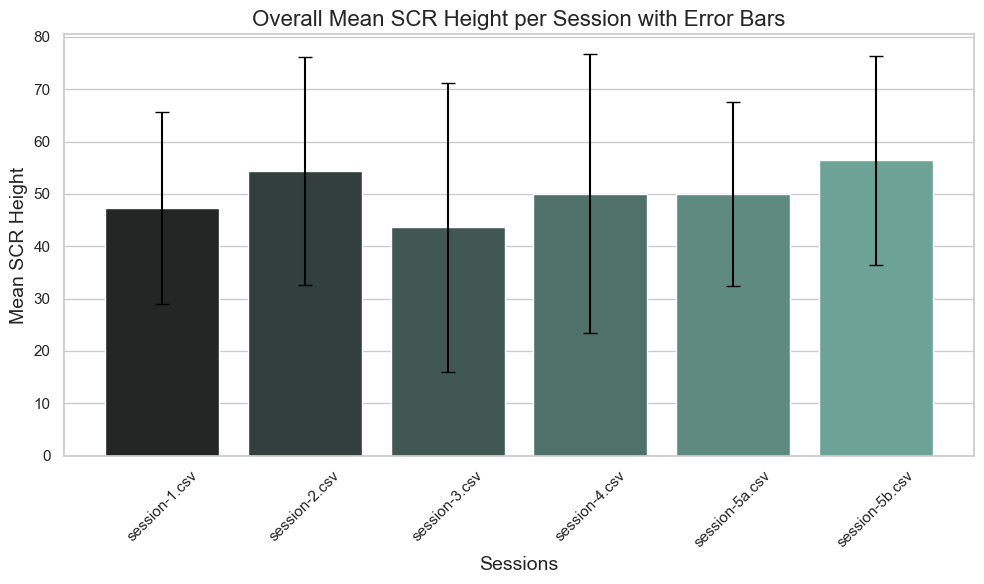

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the main folder containing subfolders for each subject
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/rapidhrv-processed-hr'

# Dictionary to store the mean SCR_Amplitude values for each subject and session
subject_mean_data = {}

# Traverse the main folder
for subject_folder in sorted(os.listdir(base_dir)):
    subject_path = os.path.join(base_dir, subject_folder)
    
    # Ensure it's a folder (ignore files in the main folder)
    if os.path.isdir(subject_path):
        # Dictionary to store mean SCR_Amplitude values for each session
        session_mean_data = {}

        # Traverse the session files in each subject folder
        for session_file in sorted(os.listdir(subject_path)):
            if session_file.endswith('.csv'):
                session_path = os.path.join(subject_path, session_file)
                
                # Read the CSV file
                df = pd.read_csv(session_path)
                
                # Calculate the mean SCR_Amplitude where SCR_Peaks == 1
                mean_HR = df['BPM'].mean()
                # mean_SCR_Amp = df.loc[df['SCR_Peaks'] == 1, 'SCR_Height'].mean()
                # mean_SCR_Amp = df.loc[(df['SCR_Peaks'] == 1) & (df['SCR_Height'] > 0.02), 'SCR_Height'].mean()
                # Save the mean value for the session
                session_mean_data[session_file] =  mean_HR
        
        # Save the mean data for the subject
        subject_mean_data[subject_folder] = session_mean_data

# Calculate overall mean SCR_Amplitude per session across all subjects
overall_mean_data = {}
all_sessions = sorted(list({session for sessions in subject_mean_data.values() for session in sessions}))

# Traverse all sessions and calculate mean across all subjects for each session
for session in all_sessions:
    session_values = [sessions.get(session, 0) for sessions in subject_mean_data.values()]
    overall_mean_data[session] = np.mean(session_values)

# Plotting only the overall mean SCR_Amplitude values for each session
plt.figure(figsize=(10, 6))


# Set the plot style using Seaborn for better aesthetics
sns.set(style="whitegrid")

# Prepare data for the plot
overall_mean_values = [overall_mean_data[session] for session in all_sessions]

# Calculate the standard deviation for each session across subjects (for error bars)
session_std_devs = [np.std([sessions.get(session, 0) for sessions in subject_mean_data.values()]) for session in all_sessions]

# Plotting the bar graph with error bars
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn with error bars
sns.barplot(x=all_sessions, y=overall_mean_values, palette='dark:#6A9', saturation=0.8, ci=None)

# Add error bars manually using plt.errorbar
plt.errorbar(all_sessions, overall_mean_values, yerr=session_std_devs, fmt='none', c='black', capsize=5)

# Add labels and title
plt.xlabel('Sessions', fontsize=14)
plt.ylabel('Mean SCR Height', fontsize=14)
plt.title('Overall Mean SCR Height per Session with Error Bars', fontsize=16)

# Rotate session labels for readability
plt.xticks(rotation=45)

# Show the plot with tight layout
plt.tight_layout()

# Display the plot
plt.show()
